# Learning outcomes
1. Gentle intro on CV
2. Review on some important notion of image arrays
3. Cropping (one of the data augmentation techniques employed in DL model training)
4. Slit and merge image channels
5. Point Operator (basic mathematical operations) / gamma correction
    * Aims: Enhance / reduce the contrast or illumination of the images
6. Image blending (add 2 images together)

## setup

In [1]:
import sys# Python 3.7 is required
assert sys.version_info>=(3,7)

import numpy as np
import cv2 as cv
from util_func import show_img

## review: important concepts on image arrays
Image can be broadly categorized as **grayscale** and **color** images.

| Grayscale | Color |
| -:- | -:- |
| matrix (2D array) | 3D array (channels) |
| (h, w) | (h, w, channels) |

In [2]:
img = np.zeros((2, 4), dtype=np.uint8)
print (img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print (img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0, 1] = 30
img[1, 2] = 100
print(img)

[[  0  30   0   0]
 [  0   0 100   0]]


In [5]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print (img_bgr)

[[[  0   0   0]
  [ 30  30  30]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


## Accessing pixel elements

In [6]:
img = cv.imread("images/lena.jfif")

a = img[50, 70, 0]
b = img.item(50, 70, 0)
a == b

True

In [7]:
%timeit a = img[50, 70, 0]
%timeit b = img.item(50, 70, 0)

223 ns ± 8.62 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
217 ns ± 2.98 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Numpy slicing

In [8]:
# Extract the top left region of the image
yc, xc = img.shape[0] // 2, img.shape[1] // 2   # center

topleft = img[:yc, :xc]

show_img("Top Left", topleft)

In [9]:
middle = img[yc-30:yc+30, xc-30:xc+30]

show_img("middle", middle)

In [10]:
# create a white image
white = np.zeros((200, 200)) + 255
white = np.uint8(white)

show_img("wihte", white)

### Exercise
Extract the region of interest (flower) from the 'flower.jfif'.

In [11]:
# Q2 : design pattern
patch = np.zeros((30, 30), dtype=np.uint8)

patch[:10, 10:20] = 255
patch[10:20, :10] = 255
patch[10:20, 20:] = 255
patch[20:, 10:20] = 255

img = np.tile(patch, (3, 3))

show_img("img", img)

In [12]:
#Q3 : extract object of interest
img = cv.imread("images/flower.jfif")
show_img("img", img)

In [13]:
[i for i in dir(cv) if i.startswith('EVENT')]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [14]:
#1 way:
def select_rect(img, x, y, flags, params):
    """mouse click callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x, y), 1, (0,0,255), -1)
        cv.imshow("img", img)

img = cv.imread("images/flower.jfif")
cv.imshow("img", img)
cv.setMouseCallback("img", select_rect)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

NameError: name 'event' is not defined

In [16]:
# 2 way
bbox = cv.selectROI('flower_region', img)

In [17]:
# 3 way:
# top left coordinate: (99, 18) and bottom righ coordinates: (190, 159)
flower = img[18:159, 99:190]
show_img("flower", flower)

## Image cropping
In terms of operations, it is identical to slicing

In [18]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_vertical_patches = 2   # set number as you like
num_horizontal_patches = 3  # set number as you like

# M and N are basically number of pixels per patch
# get row size and column size
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

tiles = []

for y in range(0, height, M):
    for x in range(0, width, N):
        
        y1 = y + M
        x1 = x + N
        
        if x1>=width and y1>=height:
            x1 = width-1
            y1 = height-1
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
            tile = img[y:height, x:width]
            tiles.append(tile)
            
        elif y1>=height:
            y1 = height-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:height, x:x1]
            tiles.append(tile)
            
        elif x1>=width:
            x1 = width-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:width]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop", img_copy)

In [19]:
show_img("top right", tiles[2])

## Swapping regions (exercise)
1. Divide the image into 4 equal regions. Swap their positions as shown below: dog_swap
2. Cover the face of lena with white mask as shown as the following: lena_mask

In [20]:
img_array = np.zeros_like(img)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

img_array[:yc, :xc] = img[yc:, xc:]
img_array[yc:, xc:] = img[:yc, :xc]
img_array[yc:, :xc] = img[:yc, xc:]
img_array[:yc, xc:] = img[yc:, :xc]

show_img("swap", img_array)

## Split and merge color channels

In [21]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

In [22]:
np.array_equal(img, img_merge)

True

In [23]:
import matplotlib.pyplot as plt

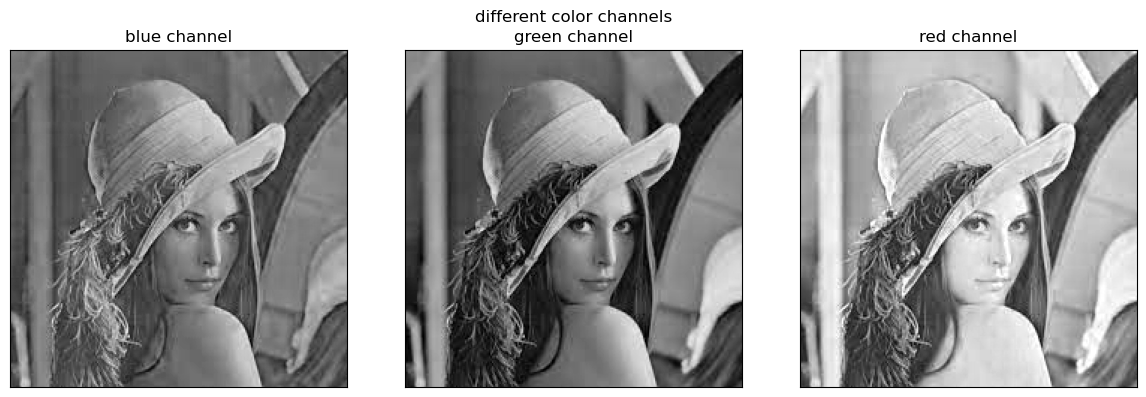

In [24]:
img = cv.imread("images/lena.jfif")

b, g, r = cv.split(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("different color channels")
ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Exercise
Display the following images which originates from the file "images/dog.jfif".

In [25]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)

colors = ("blue", "green", "red")

imgs = []

for i, mat in enumerate(channels):
    arr = np.zeros_like(img)
    arr[:, :, i] = mat
    imgs.append(arr)

for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
$$f_{trans}(\textbf{x}) = \alpha f({x}) + \beta$$

In [26]:
np.array([-2, 0, 99, 260], dtype=np.uint8)

array([254,   0,  99,   4], dtype=uint8)

In [27]:
def point_op(img, alpha, beta):
    """point operators. Arguements
    1. Source image
    2. multiplier
    3. constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    res = np.uint8(res)
    return res

In [28]:
# increase the brightness and contrast of image
img = cv.imread("images/bridge.jfif")

#increase contrast alpha must > 1
transform = point_op(img, 2, 30)

cv.imshow("original", img)
show_img("transform", transform)

In [29]:
transform2 = point_op(img, 0.8, -20)

show_img("transform2", transform2)

## Gamma correction
$$O = (\frac{I}{255})^{\gamma} \times 255$$

In [30]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype=np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma corrected", res, adjust=True)

## Image blending (add 2 images) 
$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [31]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

# Weekly exercise

1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixel of both images identical.

In [32]:
import matplotlib.pyplot as plt

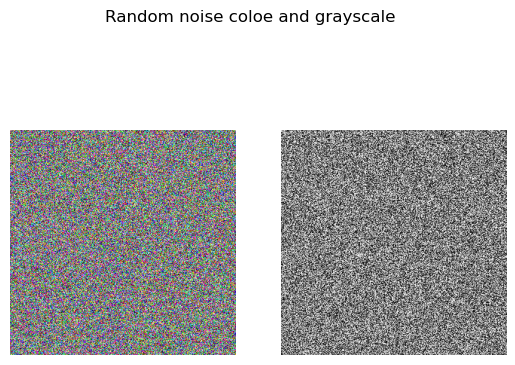

In [33]:
h, w = 300, 300

random_noise_color = np.random.randint(0, 256, (h, w, 3), dtype=np.uint8)
grayscale = np.random.randint(0, 256, (h, w), dtype=np.uint8)

random_noise_color = cv.cvtColor(random_noise_color, cv.COLOR_RGB2BGR)
grayscale = cv.cvtColor(grayscale, cv.COLOR_RGB2BGR)

plt.subplot(1, 2, 1)
plt.imshow(random_noise_color)
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(grayscale)
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.suptitle("Random noise coloe and grayscale")
plt.show()

2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
- img is the source image
- num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
- line_color is the color of the grid line.
- The output of the function should be image with grids

In [34]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    img_copy = img.copy()
    
    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N
            
            if x1 >= width and y1 >= height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                cv.imshow('tile', tile)
                
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
    
    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
img = cv.imread('images/dog.jfif')
crop_grid(img, 3, 2, (255, 0, 0))

3. Display image sequences of smooth transition of two images with different values of α. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

<function matplotlib.pyplot.show(close=None, block=None)>

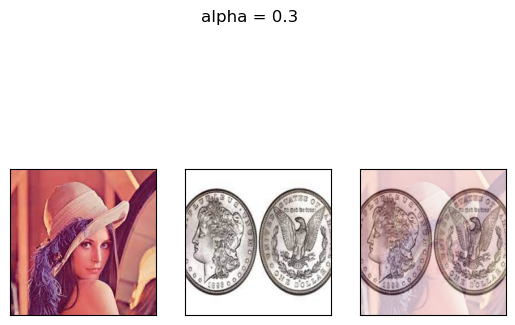

In [35]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.3
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

img_rgb = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img2_rgb = cv.cvtColor(img2, cv.COLOR_RGB2BGR)
res_rgb = cv.cvtColor(res, cv.COLOR_RGB2BGR)

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(res_rgb)
plt.xticks([]), plt.yticks([])

plt.suptitle("alpha = 0.3")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

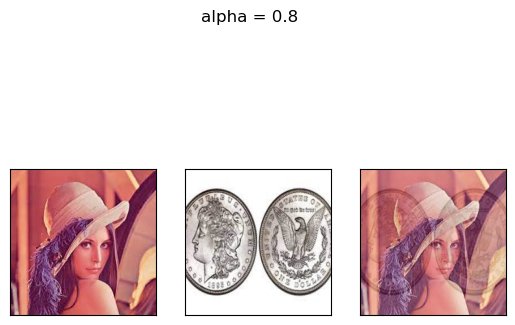

In [36]:
alpha = 0.8
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

img_rgb = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img2_rgb = cv.cvtColor(img2, cv.COLOR_RGB2BGR)
res_rgb = cv.cvtColor(res, cv.COLOR_RGB2BGR)

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(res_rgb)
plt.xticks([]), plt.yticks([])

plt.suptitle("alpha = 0.8")
plt.show

4. Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg".

<function matplotlib.pyplot.show(close=None, block=None)>

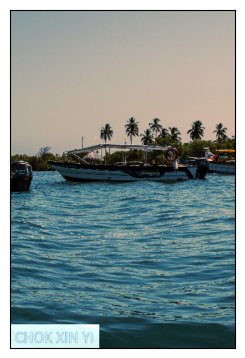

In [37]:
img = cv.imread("images/travel_hd.jpg")
img = cv.resize(img, None, fx=0.1, fy=0.1)
wm = cv.imread("images/watermark.png")
wm = cv.resize(wm, None, fx=0.25, fy=0.25)

h_img, w_img = img.shape[:2]
h_wm, w_wm = wm.shape[:2]

top_y = h_img - h_wm
bottom_y = h_img
left_x = 0
right_x = w_wm

destination = img[top_y:bottom_y, :right_x]
result = cv.addWeighted(destination, 1, wm, 0.8, 0)

img[top_y:bottom_y, :right_x] = result

# cv.imshow("original", img)
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

plt.subplot(121)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show